### A.1) Import library

In [33]:
from sklearn.datasets import make_classification
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('diabetes.csv')
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


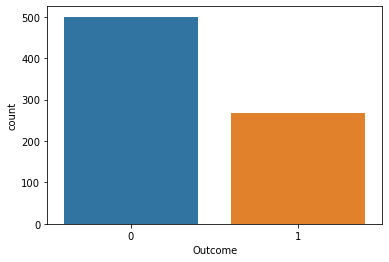

In [29]:
sns.countplot(diabetes['Outcome'],label="Count")

### A.2) Load data

In [34]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X = diabetes.drop('Outcome', axis=1)

In [38]:
diabetes.shape

(768, 9)

In [41]:

Y = diabetes.Outcome
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### B.1) Data split (80 / 20 ratio)

In [13]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
#data dimensiosn
X_train.shape, Y_train.shape

((614, 8), (614,))

In [44]:
X_test.shape, Y_test.shape

((154, 8), (154,))

### C} Build Classification model

In [45]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [46]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### D) Record Accuracy Scores for the built models

In [47]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [48]:
scores

[0.6818181818181818,
 0.7857142857142857,
 0.7727272727272727,
 0.7207792207792207,
 0.7532467532467533,
 0.7207792207792207,
 0.7662337662337663,
 0.7272727272727273,
 0.7857142857142857,
 0.7142857142857143,
 0.7662337662337663,
 0.7727272727272727,
 0.7467532467532467,
 0.6883116883116883]

### E) Model Performance Analysis

In [49]:
#make a datafrane 
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.681818
1,Linear_SVM,0.785714
2,Polynomial_SVM,0.772727
3,RBF_SVM,0.720779
4,Gaussian_Process,0.753247
5,Gradient_Boosting,0.720779
6,Decision_Tree,0.766234
7,Extra_Trees,0.727273
8,Random_Forest,0.785714
9,Neural_Net,0.714286


In [52]:
#personalize dataframe by adding colors
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.681818
1,Linear_SVM,0.785714
2,Polynomial_SVM,0.772727
3,RBF_SVM,0.720779
4,Gaussian_Process,0.753247
5,Gradient_Boosting,0.720779
6,Decision_Tree,0.766234
7,Extra_Trees,0.727273
8,Random_Forest,0.785714
9,Neural_Net,0.714286


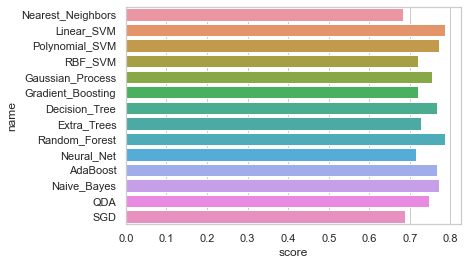

In [53]:
#barplot
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)